# 函数参数查看方法
1. `help()`函数
2. IPython/Jupyter 特有功能：? + 函数 

In [1]:
# 示例
import pandas as pd
from matplotlib.pyplot import figure
from pandas.plotting import boxplot

data=pd.read_csv('heart.csv')

# help(data.head)
#?data.head

内容输出太多就不全部展示了
接下来是针对之前学到的所有知识，针对心脏病项目的数据集来完成数据的预处理。

---

# 心脏病数据集预处理

In [27]:
import pandas as pd

data=pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

可以看到这个数据集没有缺失值，接下来观察一下数据集整体信息

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


这里以`age`和`chol`为例绘制箱线图和和密度直方图

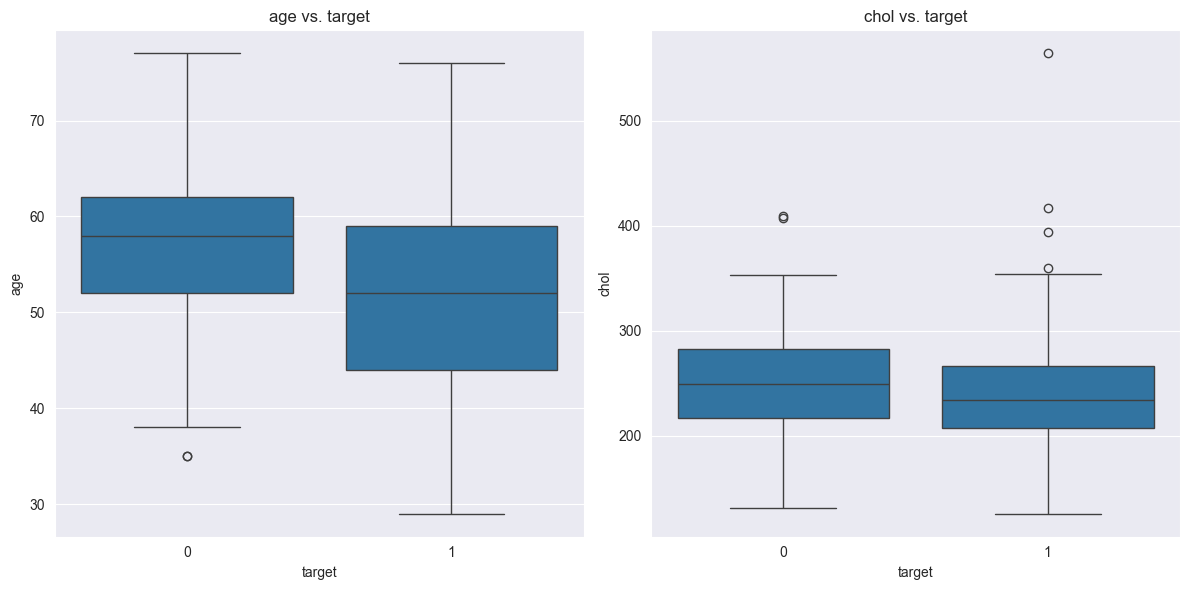

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=data['target'], y=data['age'])
plt.title('age vs. target')
plt.xlabel('target')
plt.ylabel('age')

plt.subplot(1,2,2)
sns.boxplot(x=data['target'], y=data['chol'])
plt.title('chol vs. target')
plt.xlabel('target')
plt.ylabel('chol')

plt.tight_layout()
plt.show()

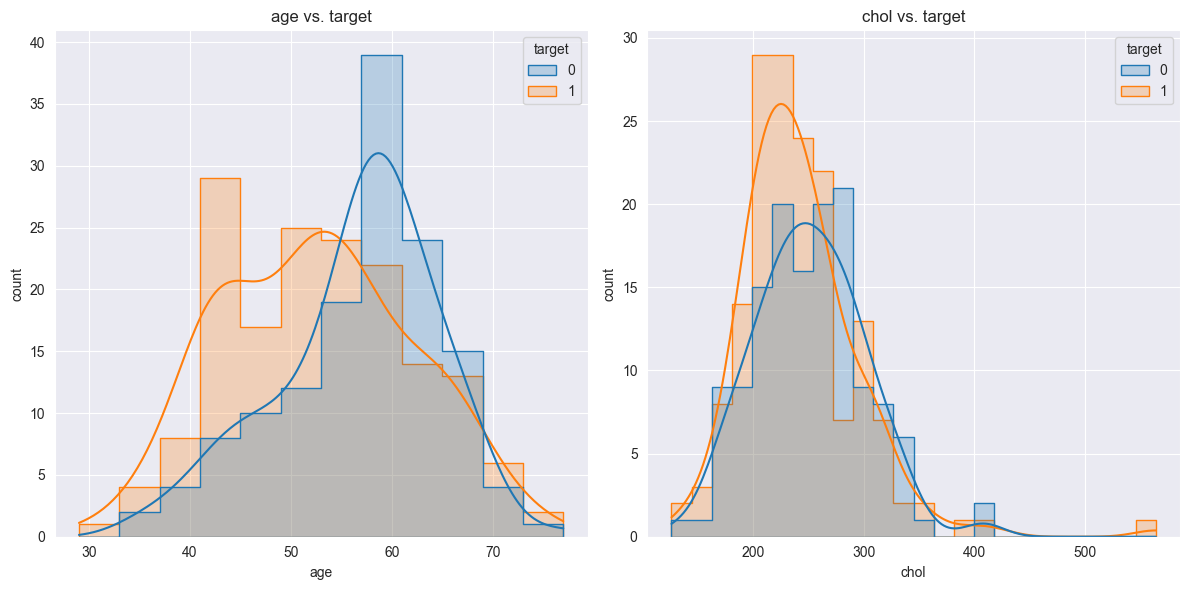

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x=data['age'],hue=data['target'],kde=True,element='step')
plt.title('age vs. target')
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.histplot(x=data['chol'],hue=data['target'],kde=True,element='step')
plt.title('chol vs. target')
plt.xlabel('chol')
plt.ylabel('count')

plt.tight_layout()
plt.show()

观察上面的图像，发现：
1. 心脏病患者多集中在中年人
2. 大部分心脏病患者胆固醇反而比不患心脏病的人低一些，但是小部分心脏病患者存在胆固醇极高的现象

接下来以`cp`为例，进行编码

In [32]:
data['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

我们对其进行独热编码

In [33]:
data=pd.get_dummies(data,columns=['cp'])# 这里为了方便观察，drop_first变量设置为False
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,False,False,False,True
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,False,True,False,False
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,False,True,False,False
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,True,False,False,False


接下来将布尔值转换为整型

In [34]:
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


至此结束